# Making Model Predictions
> Next we will apply models to real data and make predictions. We will explore some of the most common pit-falls and limitations of predictions, and we evaluate and compare models by quantifying and contrasting several measures of goodness-of-fit, including RMSE and R-squared. This is the Summary of lecture "Introduction to Linear Modeling in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Statistics, Modeling]
- image: images/data_tolerance.png

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

## Modeling Real Data


### Linear Model in Anthropology
If you found part of a skeleton, from an adult human that lived thousands of years ago, how could you estimate the height of the person that it came from? This exercise is in part inspired by the work of forensic anthropologist Mildred Trotter, who built a regression model for the calculation of stature estimates from human "long bones" or femurs that is commonly used today.

In this exercise, you'll use data from many living people, and the python library scikit-learn, to build a linear model relating the length of the femur (thigh bone) to the "stature" (overall height) of the person. Then, you'll apply your model to make a prediction about the height of your ancient ancestor.



In [2]:
femur = pd.read_csv('./dataset/femur_data.csv')
legs = femur['length'].to_numpy()
heights = femur['height'].to_numpy()

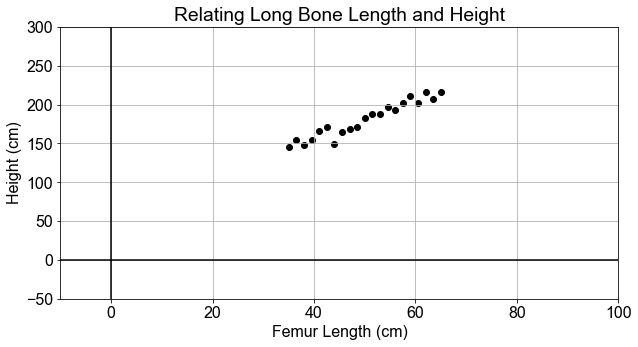

In [3]:
from matplotlib.ticker import MultipleLocator
font_options = {'family': 'Arial', 'size': 16}
plt.rc('font', **font_options)
fig, axis = plt.subplots()
axis.scatter(legs, heights, color="black", marker="o");
axis.grid(True, which="both");
axis.axhline(0, color="black");
axis.axvline(0, color="black");
axis.set_xlim(-10, 100)
axis.set_ylim(-50, 300)
axis.set_ylabel('Height (cm)');
axis.set_xlabel('Femur Length (cm)');
axis.set_title("Relating Long Bone Length and Height");

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)

# Prepare the measured data arrays and fit the model to them
legs = legs.reshape(len(legs), 1)
heights = heights.reshape(len(heights), 1)
model.fit(legs, heights)

# Use the fitted model to make a prediction for the found femur
fossil_leg = np.array([50.7]).reshape(-1, 1)
fossil_height = model.predict(fossil_leg)
print("Predicted fossil height = {:0.2f} cm".format(fossil_height[0, 0]))

Predicted fossil height = 181.34 cm


### Linear Model in Oceanography
Time-series data provides a context in which the "slope" of the linear model represents a "rate-of-change".

In this exercise, you will use measurements of sea level change from 1970 to 2010, build a linear model of that changing sea level and use it to make a prediction about the future sea level rise.

In [7]:
sea = pd.read_csv('./dataset/sea_level_data.csv')
years = sea['year'].to_numpy()
levels = sea['sea_level_inches'].to_numpy()

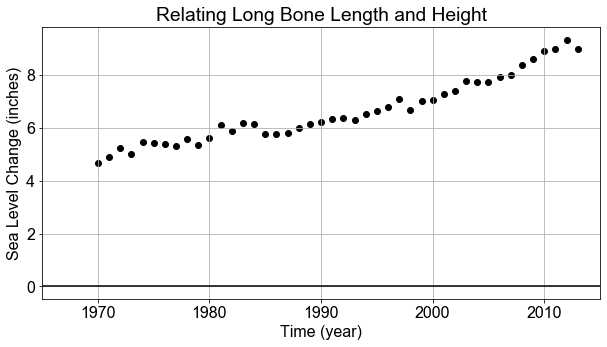

In [8]:
font_options = {'family': 'Arial', 'size': 16}
plt.rc('font', **font_options)
fig, axis = plt.subplots()
axis.scatter(years, levels, color="black", marker="o");
axis.grid(True, which="both");
axis.axhline(0, color="black");
axis.axvline(0, color="black");
axis.set_xlim(1965, 2015)
axis.set_ylabel('Sea Level Change (inches)');
axis.set_xlabel('Time (year)');
axis.set_title("Relating Long Bone Length and Height");

In [9]:
def plot_data_and_forecast(years, levels, years_forecast, levels_forecast):
    """
    Purpose:
        Over-plot the forecast data with the measured data used to fit the model
    Args:
        years (np.array): independent ("x") variable of measured data set
        levels (np.array): dependent ("y") variable of measured data set
        years_forecast (np.array): independent ("x") variable of forecast/modeled data
        levels_forecast (np.array): dependent ("y") variable of forecast/modeled data
    Returns:
        fig (matplotlib.figure): matplotlib figure object containing the plot
    """
    font_options = {'family': 'Arial', 'size': 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(8,4))
    axis.plot(years, levels, color="black", linestyle=" ", marker="o", label='Data')
    axis.plot(years_forecast, levels_forecast, marker=".", color="red", label='Forecast')
    axis.grid(True, which="both")
    axis.axhline(0, color="black")
    axis.axvline(0, color="black")
    axis.xaxis.set_major_locator(MultipleLocator(50.0))
    axis.xaxis.set_minor_locator(MultipleLocator(10.0))
    axis.yaxis.set_major_locator(MultipleLocator(5.0))
    axis.yaxis.set_minor_locator(MultipleLocator(1.0))
    axis.set_ylim([0, 20])
    axis.set_xlim([1965, 2105])
    axis.set_ylabel('Sea Level Change (inches)')
    axis.set_xlabel('Time (years)')
    axis.set_title("Global Average Sea Level Change")
    axis.legend()
    plt.show()
    return fig

Prediction: year = [[2100]], level = 16.66


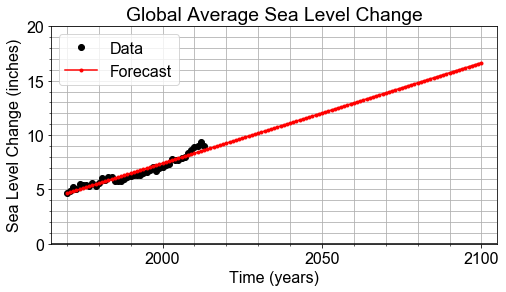

In [10]:
# Build a model, fit to the data
model = LinearRegression(fit_intercept=True)
years = years.reshape(len(years), 1)
levels = levels.reshape(len(levels), 1)
model.fit(years, levels)

# Use model to make a prediction for one year, 2100
future_year = np.array([2100]).reshape(-1, 1)
future_level = model.predict(future_year)
print("Prediction: year = {}, level = {:.02f}".format(future_year, future_level[0, 0]))

# Use model to predict for many years, and over-plot with measured data
years_forecast = np.linspace(1970, 2100, 131).reshape(-1, 1)
levels_forecast = model.predict(years_forecast)
fig = plot_data_and_forecast(years, levels, years_forecast, levels_forecast)

### Linear Model in Cosmology
Less than 100 years ago, the universe appeared to be composed of a single static galaxy, containing perhaps a million stars. Today we have observations of hundreds of billions of galaxies, each with hundreds of billions of stars, all moving.

The beginnings of the modern physical science of cosmology came with the [publication in 1929 by Edwin Hubble](http://www.pnas.org/content/15/3/168) that included use of a linear model.

In this exercise, you will build a model whose slope will give Hubble's Constant, which describes the velocity of galaxies as a linear function of distance from Earth.

In [11]:
df = pd.read_csv('./dataset/hubble_data.csv')
df.head()

names  distances  velocities
0      SMC      0.032         170
1      LMC      0.034         290
2  NGC-221      0.275        -185
3  NGC-224      0.275        -220
4  NGC-598      0.263         -70

In [12]:
from statsmodels.formula.api import ols

# Fit the model, based on the form of the formula
model_fit = ols(formula='velocities ~ distances', data=df).fit()

# Extract the model parameters and associated "errors" or uncertainties
a0 = model_fit.params['Intercept']
a1 = model_fit.params['distances']
e0 = model_fit.bse['Intercept']
e1 = model_fit.bse['distances']

# Print the results
print('For slope a1={:.02f}, the uncertainty in a1 is {:.02f}'.format(a1, e1))
print('For intercept a0={:.02f}, the uncertainty in a0 is {:.02f}'.format(a0, e0))

For slope a1=454.16, the uncertainty in a1 is 75.24
For intercept a0=-40.78, the uncertainty in a0 is 83.44


## The Limits of Prediction

### Interpolation: Inbetween Times
In this exercise, you will build a linear model by fitting monthly time-series data for the Dow Jones Industrial Average (DJIA) and then use that model to make predictions for daily data (in effect, an interpolation). Then you will compare that daily prediction to the real daily DJIA data.

A few notes on the data. "OHLC" stands for "Open-High-Low-Close", which is usually daily data, for example the opening and closing prices, and the highest and lowest prices, for a stock in a given day. "DayCount" is an integer number of days from start of the data collection.

In [13]:
def plot_model_with_data(df, data_label='Data'):
    font_options = {'family': 'Arial', 'size': 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(8,6))
    RSS = np.sum(np.square(df.Model - df.Close))
    df.Close.plot(ax=axis, color="black", marker="o", linestyle=" ", label=data_label)
    df.Model.plot(ax=axis, color="red", marker=" ", linestyle="-", label="Model")
    axis.set_ylabel("DJIA")
    axis.set_title('RSS = {:0.1f}'.format(RSS))
    axis.grid(True, which="both")
    axis.legend()
    plt.show()
    return fig

In [14]:
df_monthly = pd.read_csv('./dataset/df_monthly.csv', index_col='Date', parse_dates=True)
df_daily = pd.read_csv('./dataset/df_daily.csv', index_col='Date', parse_dates=True)

In [15]:
df_monthly = df_monthly.asfreq('MS')
df_daily = df_daily.asfreq('D')

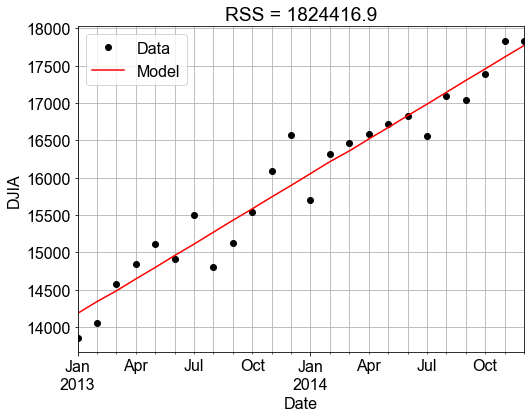

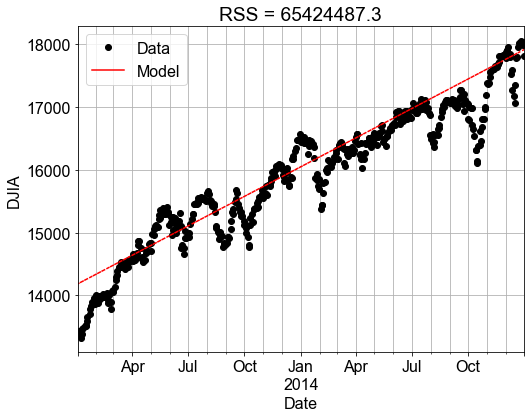

In [16]:
# Build and fit a model to the df_monthly data
model_fit = ols('Close ~ DayCount', data=df_monthly).fit()

# Use the model fit to the monthly data to make a predictions for both monthly and daily data
df_monthly['Model'] = model_fit.predict(df_monthly.DayCount)
df_daily['Model'] = model_fit.predict(df_daily.DayCount)

# Plot the monthly and daily data and model. compare the RSS values seen on the figures
fig_monthly = plot_model_with_data(df_monthly)
fig_daily = plot_model_with_data(df_daily)

Notice the monthly data looked linear, but the daily data clearly has additional, nonlinear trends. Under-sampled data often misses real-world features in the data on smaller time or spatial scales. Using the model from the under-sampled data to make interpolations to the daily data can result is large residuals. Notice that the RSS value for the daily plot is more than 30 times worse than the monthly plot

### Extrapolation: Going Over the Edge
In this exercise, we consider the perils of extrapolation. Shown here is the profile of a hiking trail on a mountain. One portion of the trail, marked in black, looks linear, and was used to build a model. But we see that the best fit line, shown in red, does not fit outside the original "domain", as it extends into this new outside data, marked in blue.

If we want use the model to make predictions for the altitude, but still be accurate to within some tolerance, what are the smallest and largest values of independent variable x that we can allow ourselves to apply the model to?"

In [28]:
def plot_data_model_tolerance(x_data, y_data, y_model, tolerance=100):
    """
    Purpose: 
        Plot data (x_data, y_data) and overplot model (x_data, y_model)
    Args:
        x_data (np.array): numpy array of values of independent variable
        y_data (np.array): numpy array of values of dependent variable
        y_model (np.array): numpy array of values of the modeled dependent variable
        tolerance (float): for plotting when np.abs(y_model - y_data) < tolerance
    Returns:
        fig (matplotlib.figure): matplotlib figure object
    """
    from matplotlib.ticker import MultipleLocator
    residuals = np.abs(y_model - y_data)
    x_good = x_data[residuals < tolerance]
    y_good = y_model[residuals < tolerance]
    x_min = np.min( x_good )
    x_max = np.max( x_good )
    font_options = {'family': 'Arial', 'size': 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(8,6))
    x = x_data
    y = y_data
    axis.plot(x[(x>=0) & (x<=10)], y[(x>=0) & (x<=10)], color="black", linestyle=" ", marker="o")
    axis.plot(x[x>10], y[x>10], color="blue", linestyle=" ", marker="o")
    axis.plot(x[x<0], y[x<0], color="blue", linestyle=" ", marker="o")
    axis.plot(x_data, y_model, color="red")
    axis.grid(True, which="both")
    axis.axhline(0, color="black")
    axis.axvline(0, color="black")
    axis.set_ylim([-5*50, 15*50])
    axis.set_xlim([-15, 25])
    axis.xaxis.set_major_locator(MultipleLocator(5.0))
    axis.xaxis.set_minor_locator(MultipleLocator(1.0))
    axis.yaxis.set_major_locator(MultipleLocator(5.0*50))
    axis.yaxis.set_minor_locator(MultipleLocator(1.0*50))
    axis.set_ylabel('Altitude (meters)')
    axis.set_xlabel('Step Distance (Kilometers)')
    axis.set_title("Hiking  Trip")
    style_options = dict(color="green", alpha=0.35, linewidth=8)
    line = axis.plot(x_good, y_good, **style_options)
    plt.savefig('../images/data_tolerance.png')
    plt.show()
    return fig

In [29]:
x_data = np.array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
        -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
        -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
         3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,
         8. ,   8.5,   9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,
        12.5,  13. ,  13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,
        17. ,  17.5,  18. ,  18.5,  19. ,  19.5,  20. ])
y_data = np.array([  73.33885174,   91.52854842,   41.87555998,  103.06980499,
         77.57108039,   99.70512917,  106.70722978,  128.26034956,
        117.88171452,  136.65021987,   82.60474807,   86.82566796,
        122.477045  ,  114.41893877,  127.63451229,  143.2255083 ,
        136.61217437,  154.76845765,  182.39147012,  122.51909166,
        161.78587909,  132.72560763,  210.81767421,  179.6837026 ,
        181.98528167,  234.67907351,  246.48971034,  221.58691239,
        250.3924093 ,  206.43287615,  303.75089312,  312.29865056,
        323.8331032 ,  261.9686295 ,  316.64806585,  337.55295912,
        360.13633529,  369.72729852,  408.0289548 ,  348.82736117,
        394.93384188,  366.03460828,  374.7693763 ,  371.26981466,
        377.88763074,  320.70120977,  336.82269401,  262.00816122,
        290.35612838,  308.90807157,  259.98783618,  265.86978322,
        271.12330621,  258.58229827,  241.52677418,  204.38155251,
        198.05166573,  174.36397174,  190.97570971,  217.20785477,
        146.83883158])
y_model = np.array([-100. ,  -87.5,  -75. ,  -62.5,  -50. ,  -37.5,  -25. ,  -12.5,
          0. ,   12.5,   25. ,   37.5,   50. ,   62.5,   75. ,   87.5,
        100. ,  112.5,  125. ,  137.5,  150. ,  162.5,  175. ,  187.5,
        200. ,  212.5,  225. ,  237.5,  250. ,  262.5,  275. ,  287.5,
        300. ,  312.5,  325. ,  337.5,  350. ,  362.5,  375. ,  387.5,
        400. ,  412.5,  425. ,  437.5,  450. ,  462.5,  475. ,  487.5,
        500. ,  512.5,  525. ,  537.5,  550. ,  562.5,  575. ,  587.5,
        600. ,  612.5,  625. ,  637.5,  650. ])

Minimum good x value = -5.0
Maximum good x value = 12.0


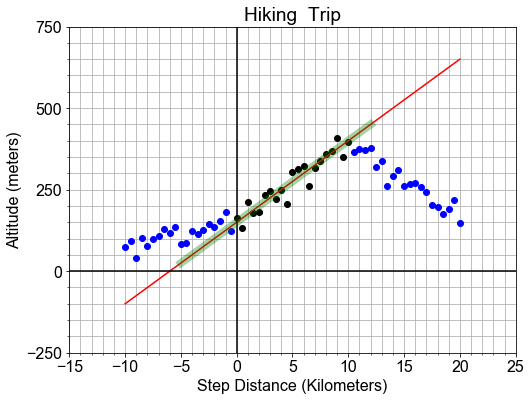

In [30]:
# Compute the residuals, "data - model", and determine where [residuals < tolerance]
residuals = np.abs(y_data - y_model)
tolerance = 100
x_good = x_data[residuals < tolerance]

# Find the min and max of the "good" values, and plot y_data, y_model, and the tolerance range
print('Minimum good x value = {}'.format(np.min(x_good)))
print('Maximum good x value = {}'.format(np.max(x_good)))
fig = plot_data_model_tolerance(x_data, y_data, y_model, tolerance)

Notice the range of good values, which extends a little out into the new data, is marked in green on the plot. By comparing the residuals to a tolerance threshold, we can quantify how far out out extrapolation can go before the difference between model and data gets too large.

## Goodness-of-Fit
- 3 Different R's
    - Building Models:
        - RSS (Residual Sum of Squares)
    - Evaluating Models
        - RMSE (Root Mean Squared Error)
        - R-Squared
- RMSE vs R-Squared
    - RMSE: how much variation is residual
    - R-squared: what fraction of variabtion is linear
        

### RMSE Step-by-step
In this exercise, you will quantify the over-all model "goodness-of-fit" of a pre-built model, by computing one of the most common quantitative measures of model quality, the RMSE, step-by-step.

In [20]:
def model_fit_and_predict(x, y):
    a0=150
    a1=25
    ym = a0 + (a1*x)
    return ym

In [21]:
# Build the model and compute the residuals "model - data"
y_model = model_fit_and_predict(x_data, y_data)
residuals = y_model - y_data

# Compute the RSS, MSE, RMSE and print the results
RSS = np.sum(np.square(residuals))
MSE = RSS / len(residuals)
RMSE = np.sqrt(MSE)
print('RMSE = {:0.2f}, MSE = {:0.2f}, RSS = {:0.2f}'.format(RMSE, MSE, RSS))

RMSE = 180.12, MSE = 32442.25, RSS = 1978976.98


Notice that instead of computing RSS and normalizing with division by ```len(residuals)``` to get the MSE, you could have just applied ```np.mean(np.square())``` to the ```residuals```. Another useful point to help you remember; you can think of the MSE like a variance, but instead of differencing the data from its mean, you difference the data and the model. Similarly, think of RMSE as a standard deviation.

### R-Squared
In this exercise you'll compute another measure of goodness, R-squared. R-squared is the ratio of the variance of the residuals divided by the variance of the data we are modeling, and in so doing, is a measure of how much of the variance in your data is "explained" by your model, as expressed in the spread of the residuals.  you're goal is to compute the R-squared measure to quantify how much this linear model accounts for variation in the data.

In [22]:
x_data = np.array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ])
y_data = np.array([ 161.78587909,  132.72560763,  210.81767421,  179.6837026 ,
        181.98528167,  234.67907351,  246.48971034,  221.58691239,
        250.3924093 ,  206.43287615,  303.75089312,  312.29865056,
        323.8331032 ,  261.9686295 ,  316.64806585,  337.55295912,
        360.13633529,  369.72729852,  408.0289548 ,  348.82736117,
        394.93384188])
y_model = np.array([ 150. ,  162.5,  175. ,  187.5,  200. ,  212.5,  225. ,  237.5,
        250. ,  262.5,  275. ,  287.5,  300. ,  312.5,  325. ,  337.5,
        350. ,  362.5,  375. ,  387.5,  400. ])

In [23]:
# Compute the residuals and the deviations
residuals = y_model - y_data
deviations = np.mean(y_data) - y_data

# Compute the variance of the residuals and deviations
var_residuals = np.mean(np.square(residuals))
var_deviations = np.mean(np.square(deviations))

# Compute r_squared as 1 - the ration of RSS/Variance
r_squared = 1 - (var_residuals / var_deviations)
print('R-squared is {:0.2f}'.format(r_squared))

R-squared is 0.89


 Notice that R-squared varies from 0 to 1, where a value of 1 means that the model and the data are perfectly correlated and all variation in the data is predicted by the model. A value of zero would mean none of the variation in the data is predicted by the model. Here, the data points are close to the line, so R-squared is closer to 1.0

## Standard Error
- Uncertainty in Predictrions
    - Model Predctions and RMSE:
        - predictions compared to data gives residuals
        - residuals have spread
        - RMSE, measures residual spread
        - RMSE, quantifies prediction goodness
- Uncertainty in Parameters
    - Model Parameters and Standard Error:
        - Parameter value as center
        - Parameter standard error as spread
        - Standard Error, measures parameter uncertainty

### Variation Around the Trend
The data need not be perfectly linear, and there may be some random variation or "spread" in the measurements, and that does translate into variation of the model parameters. This variation is in the parameter is quantified by "standard error", and interpreted as "uncertainty" in the estimate of the model parameter.

In [24]:
x_data = np.array([ 0.        ,  0.08333333,  0.16666667,  0.25      ,  0.33333333,
        0.41666667,  0.5       ,  0.58333333,  0.66666667,  0.75      ,
        0.83333333,  0.91666667,  1.        ,  1.08333333,  1.16666667,
        1.25      ,  1.33333333,  1.41666667,  1.5       ,  1.58333333,
        1.66666667,  1.75      ,  1.83333333,  1.91666667,  2.        ])
y_data = np.array([   4.87303609,    2.33139743,    6.74881808,    9.28109413,
         19.26288955,   13.92871724,   30.23443529,   26.88304596,
         34.29045062,   36.75188887,   46.05299048,   39.6529112 ,
         49.03274839,   53.0145036 ,   61.73464166,   59.2003262 ,
         66.14938204,   68.19975808,   75.12664124,   80.91511231,
         80.0314758 ,   90.93417113,   94.37143883,   97.34081635,
        102.70256785])

In [25]:
# Store x_data and y_data, as times and distances, in df, and use ols() to fit a model to it.
df = pd.DataFrame(dict(times=x_data, distances=y_data))
model_fit = ols(formula="distances ~ times", data=df).fit()

# Extact the model parameters and their uncertainties
a0 = model_fit.params['Intercept']
e0 = model_fit.bse['Intercept']
a1 = model_fit.params['times']
e1 = model_fit.bse['times']

# Print the results with more meaningful names
print('Estimate    of the intercept = {:0.2f}'.format(a0))
print('Uncertainty of the intercept = {:0.2f}'.format(e0))
print('Estimate    of the slope = {:0.2f}'.format(a1))
print('Uncertainty of the slope = {:0.2f}'.format(e1))

Estimate    of the intercept = -0.81
Uncertainty of the intercept = 1.29
Estimate    of the slope = 50.78
Uncertainty of the slope = 1.11


The size of the parameters standard error only makes sense in comparison to the parameter value itself. In fact the units are the same! So a1 and e1 both have units of velocity (meters/second), and a0 and e0 both have units of distance (meters).

### Variation in Two Parts
Given two data sets of distance-versus-time data, one with very small velocity and one with large velocity. Notice that both may have the same standard error of slope, but different R-squared for the model overall, depending on the size of the slope ("effect size") as compared to the standard error ("uncertainty").

If we plot both data sets as scatter plots on the same axes, the contrast is clear. Variation due to the slope is different than variation due to the random scatter about the trend line. In this exercise, your goal is to compute the standard error and R-squared for two data sets and compare.

In [26]:
df = pd.read_csv('./dataset/time_distances.csv', index_col=0)

In [27]:
# Build and fit two models, for columns distances1 and distances2 in df
model_1 = ols(formula="distances1 ~ times", data=df).fit()
model_2 = ols(formula="distances2 ~ times", data=df).fit()

# Extract R-squared for each model, and the standard error for each slope
se_1 = model_1.bse['times']
se_2 = model_2.bse['times']
rsquared_1 = model_1.rsquared
rsquared_2 = model_2.rsquared

# Print the results
print('Model 1: SE = {:0.3f}, R-squared = {:0.3f}'.format(se_1, rsquared_1))
print('Model 2: SE = {:0.3f}, R-squared = {:0.3f}'.format(se_2, rsquared_2))

Model 1: SE = 3.694, R-squared = 0.898
Model 2: SE = 3.694, R-squared = 0.335


Notice that the standard error is the same for both models, but the r-squared changes. The uncertainty in the estimates of the model parameters is indepedent from R-squred because that uncertainty is being driven not by the linear trend, but by the inherent randomness in the data. This serves as a transition into looking at statistical inference in linear models.